# CUSTOMER CHURN PREDICTION



## Problem Statement:
### The problem statement typically describes the objective or goal of the analysis. It should clarify what you aim to achieve by analyzing the dataset. For example:

### "The dataset contains information about customers of a telecommunications company. The goal is to predict customer churn, i.e., whether a customer will leave the service provider or not. Churn prediction is crucial for businesses to retain customers and maintain profitability."

## Dataset Description:
### Provide an overview of the dataset, including the number of samples, features, and target variable. Mention any categorical or numerical variables and their significance in the analysis.

### "The dataset consists of 7043 records and 21 columns. Each record represents a customer, and the features include demographic information, subscription details, and usage patterns. The target variable is 'Churn,' indicating whether the customer churned or not."

## Features Description:


### CustomerID: Unique identifier for each customer (string).
### Gender: Gender of the customer (categorical: 'Male' or 'Female').
### SeniorCitizen: Whether the customer is a senior citizen (binary: 0 or 1).
### Partner: Whether the customer has a partner (binary: 'Yes' or 'No').
### Dependents: Whether the customer has dependents (binary: 'Yes' or 'No').
### Tenure: Number of months the customer has been with the company (numerical).
### PhoneService: Whether the customer has phone service (binary: 'Yes' or 'No').
### MultipleLines: Whether the customer has multiple lines (categorical: 'Yes', 'No', or 'No phone service').
### InternetService: Type of internet service subscribed by the customer (categorical: 'DSL', 'Fiber optic', or 'No').
### OnlineSecurity: Whether the customer has online security service (categorical: 'Yes', 'No', or 'No internet service').
### OnlineBackup: Whether the customer has online backup service (categorical: 'Yes', 'No', or 'No internet service').
### DeviceProtection: Whether the customer has device protection service (categorical: 'Yes', 'No', or 'No internet service').
### TechSupport: Whether the customer has tech support service (categorical: 'Yes', 'No', or 'No internet service').
### StreamingTV: Whether the customer has streaming TV service (categorical: 'Yes', 'No', or 'No internet service').
### StreamingMovies: Whether the customer has streaming movie service (categorical: 'Yes', 'No', or 'No internet service').
### Contract: Type of contract subscribed by the customer (categorical: 'Month-to-month', 'One year', or 'Two year').
### PaperlessBilling: Whether the customer uses paperless billing (binary: 'Yes' or 'No').
### PaymentMethod: Payment method used by the customer (categorical: 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', or 'Credit card (automatic)').
### MonthlyCharges: Monthly charges for the services (numerical).
### TotalCharges: Total charges incurred by the customer (numerical).
### Churn: Whether the customer churned or not (binary: 'Yes' or 'No').

## Importing all the required libraries

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [249]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Understanding the dataset

In [250]:
data.shape

(7043, 21)

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### To use later for identifying which all customers might churn later

In [252]:
cust_id=data["customerID"]

In [253]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [254]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### No null values are present, so no need of dropping rows or columns nor there is a need for imputation

In [255]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [256]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## DATA VISUALIZATION
### Countplots of different features

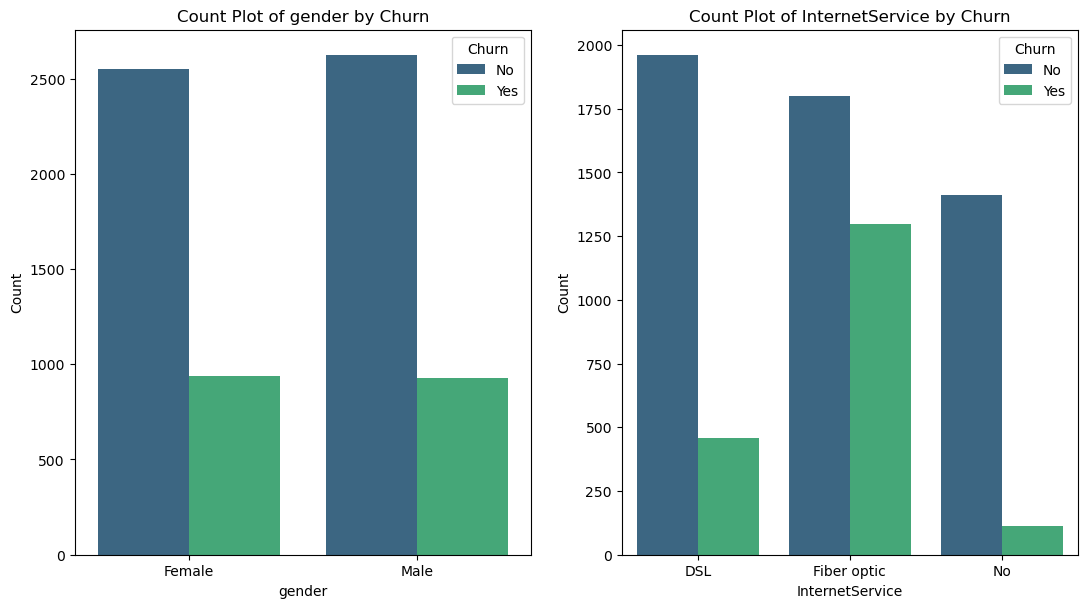

In [257]:

# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Define the features to plot
features = ['gender', 'InternetService']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot each feature against Churn
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=feature, hue='Churn', palette='viridis')
    plt.title(f'Count Plot of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

# Adjust layout and show plot

plt.show()

#### We cannot find any noticeable difference between gender and whether or not the customer will churn or not.
#### We can see in the Count Plot of Internet Service by Churn that more people who have opted Fiber Optic service have left compared to others. The customers who have not taken any service not leaving as much.

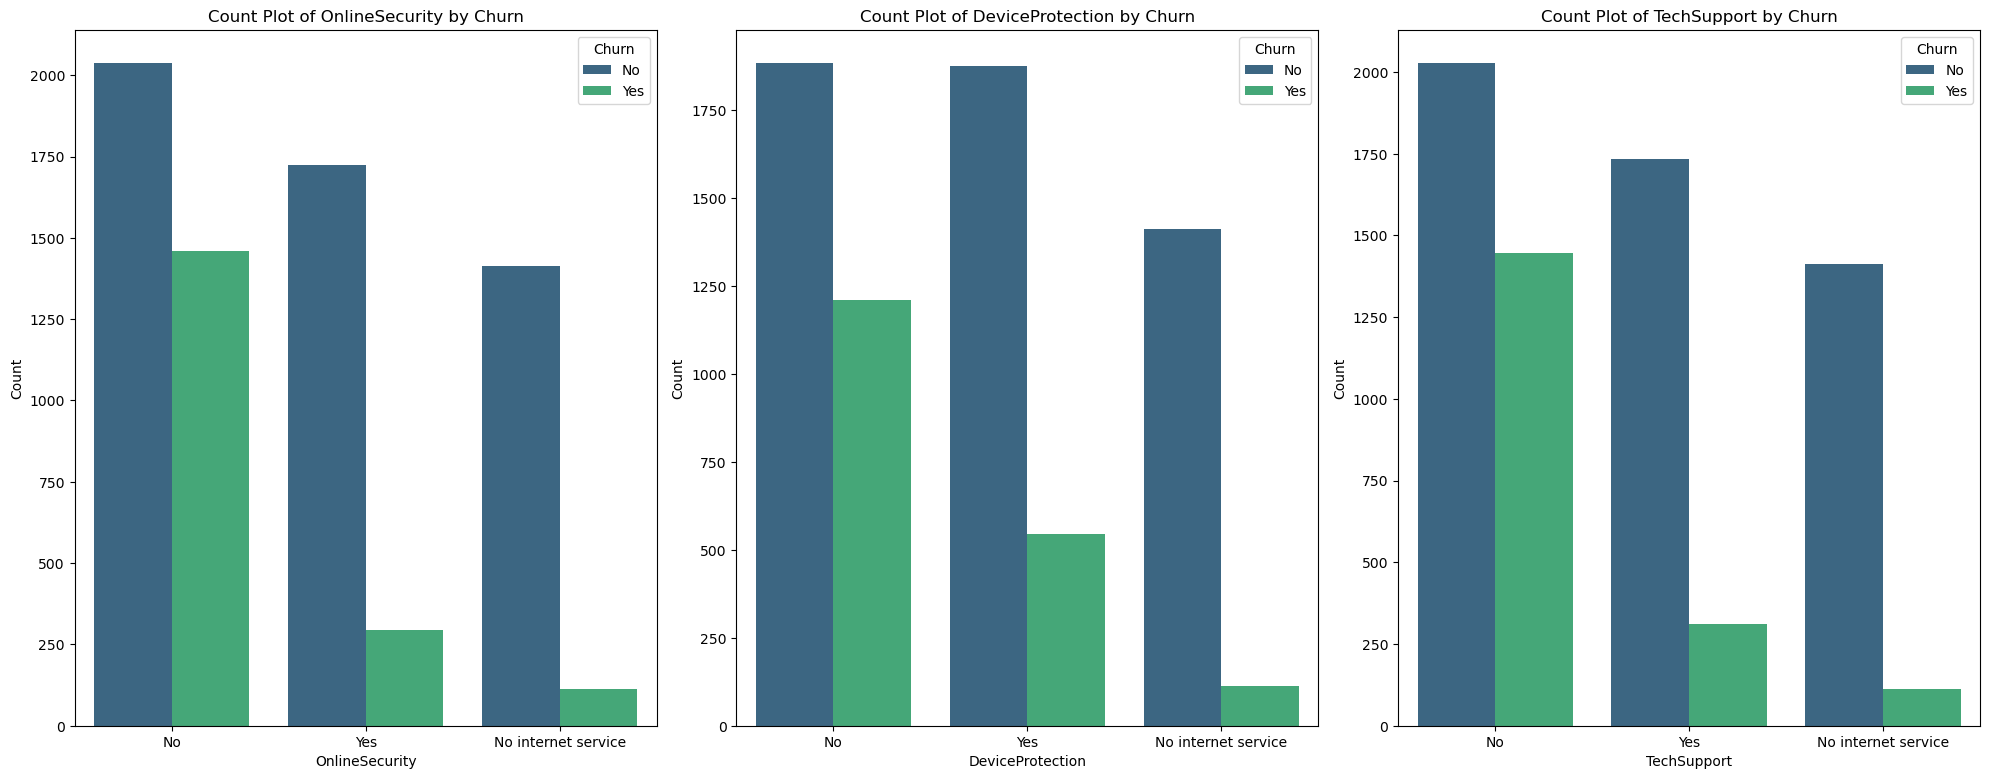

In [258]:
features=['OnlineSecurity','DeviceProtection', 'TechSupport']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=feature, hue='Churn', palette='viridis')
    plt.title(f'Count Plot of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### We can see that the customer who have not taken any Online Security and have Internet Service are leaving more than others. This could be due to attacks or viruses they might be facing by not opting for the online security that is provided.
#### We can see the same trend but in a smaller scale in the graph of Device protection to Churn as people with no Device Protection is leaving more than others.
#### Also in the countplot of Tech support to Churn, customers with no techsupport are leaving more than others. This could be due to the inability to solve the problems they might be facing and they are unable to find the help they require.

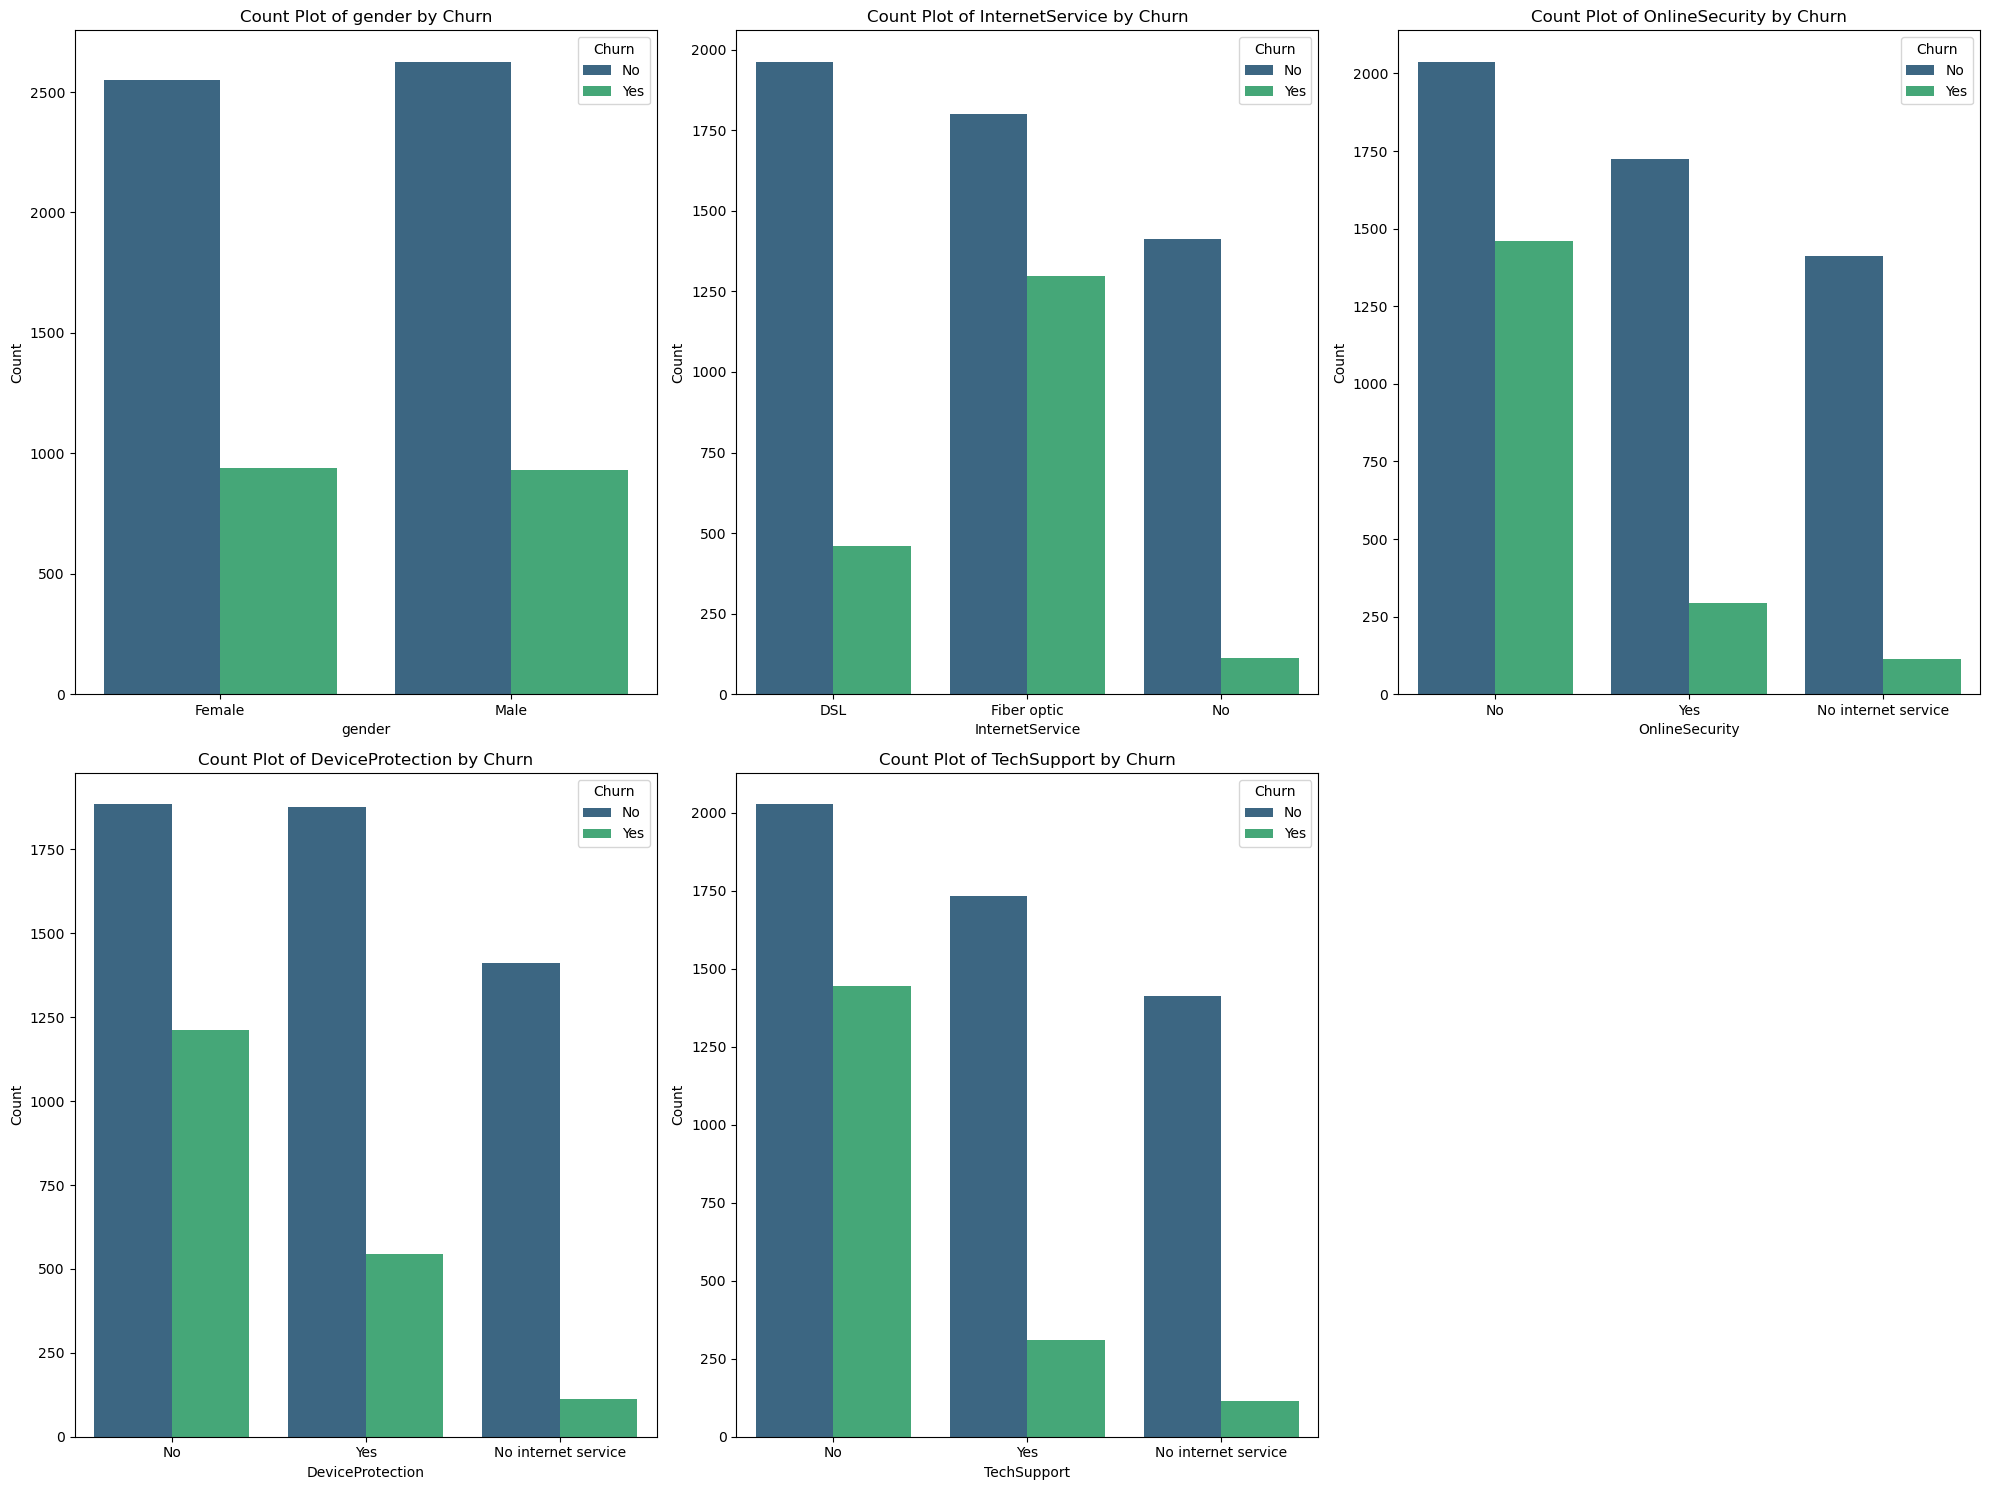

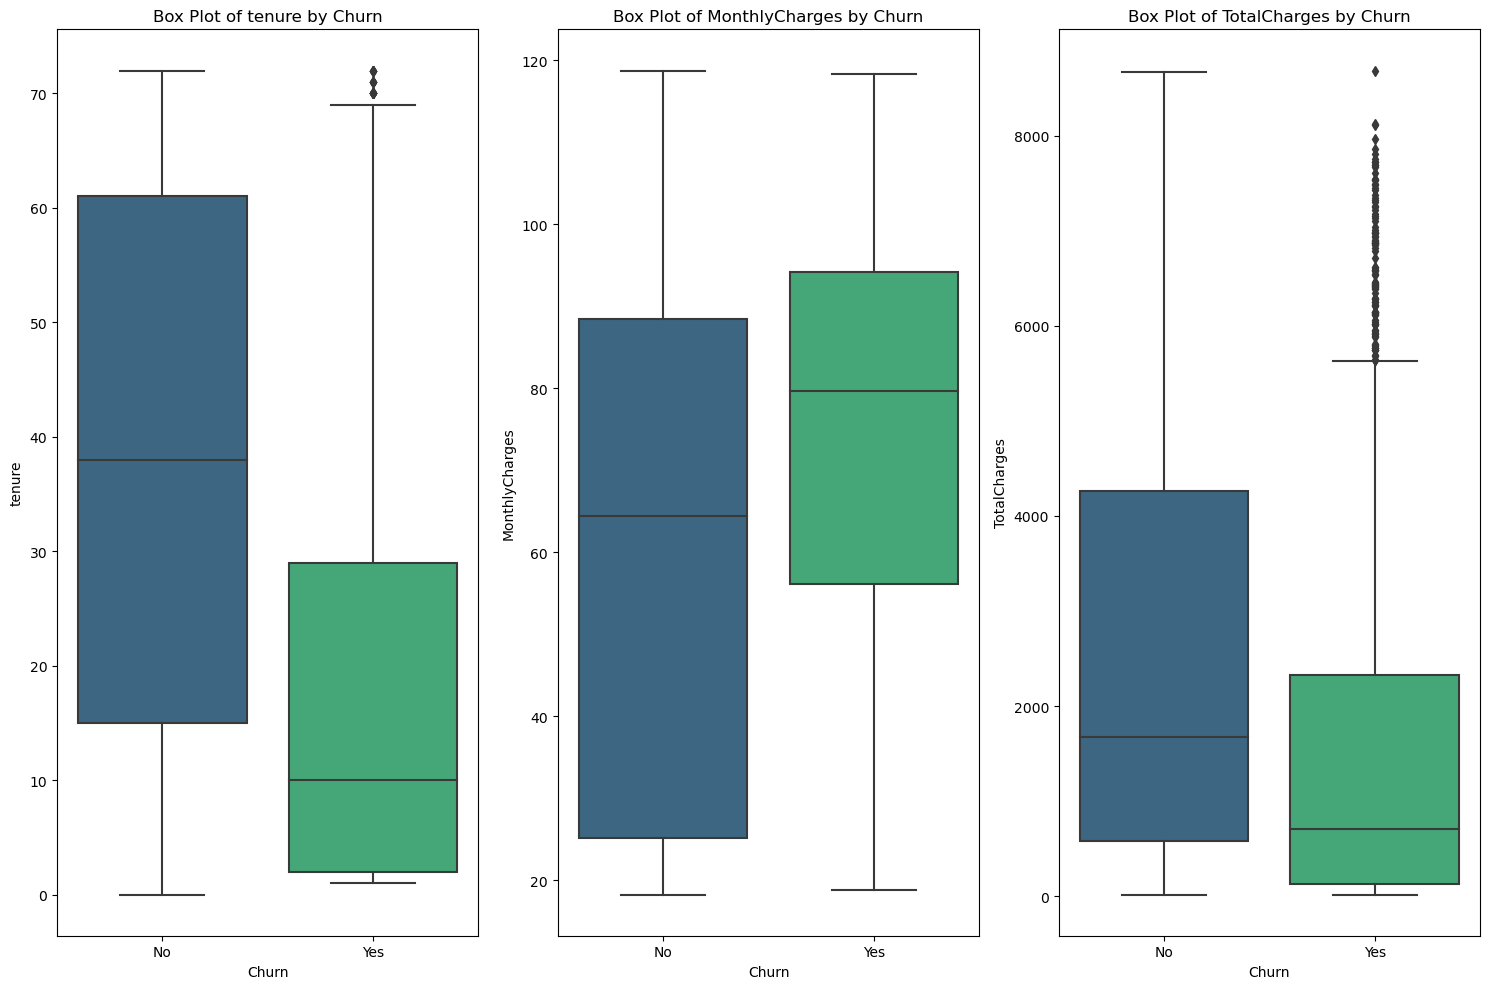

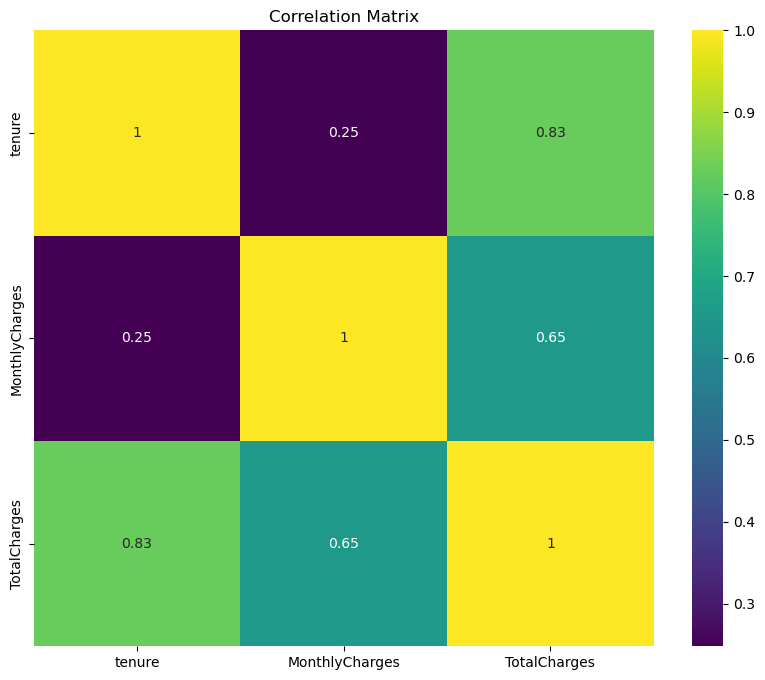

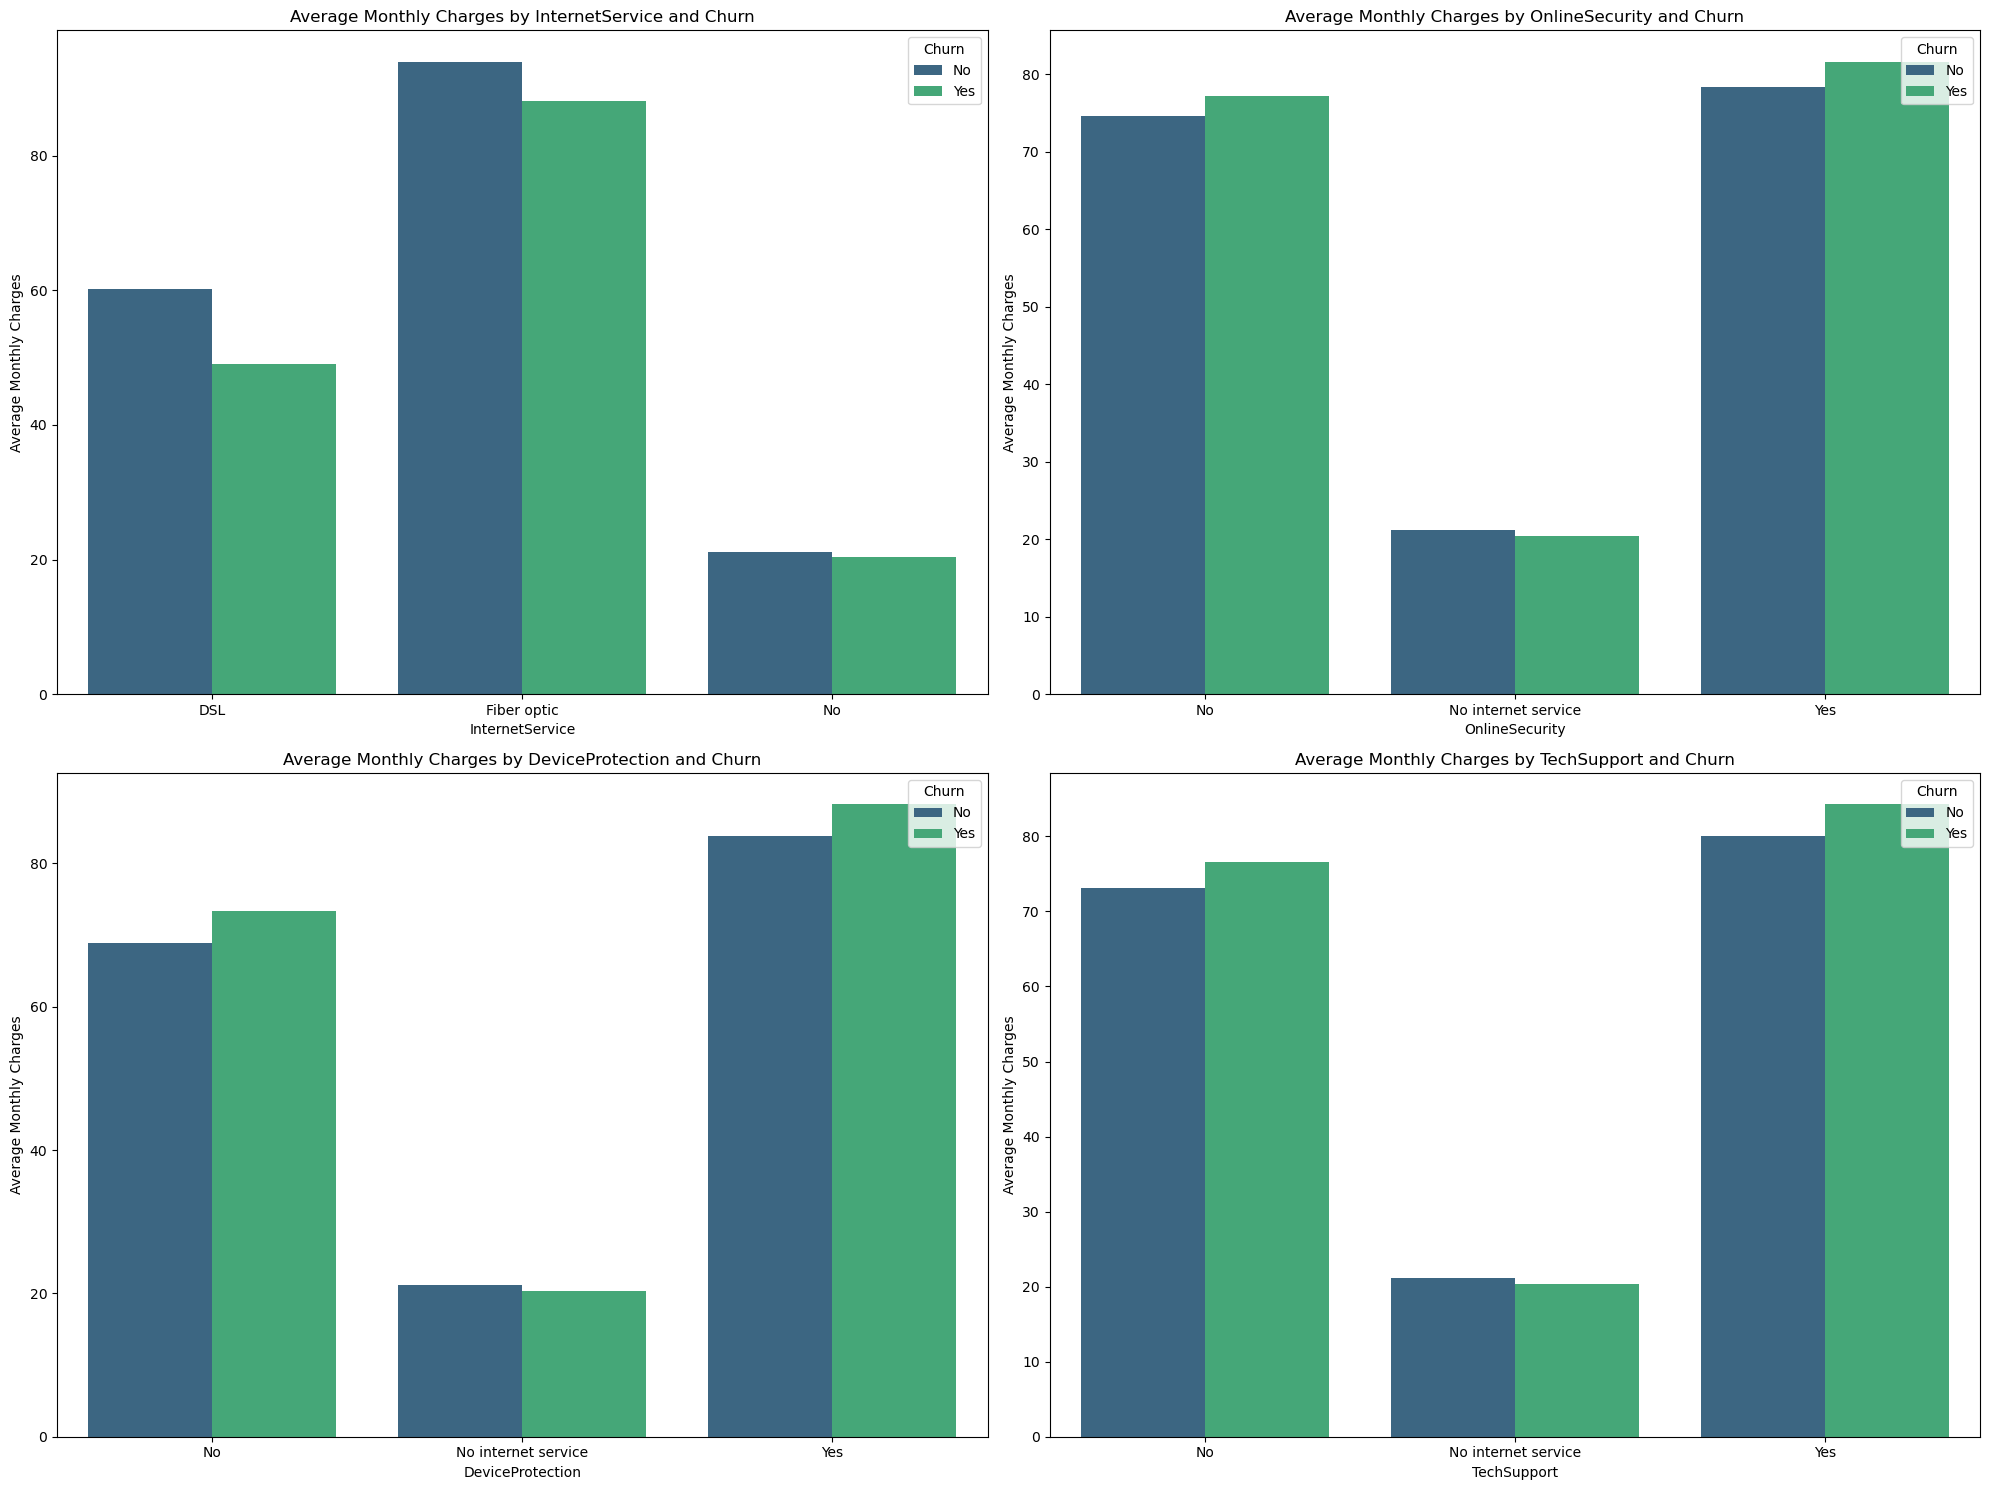

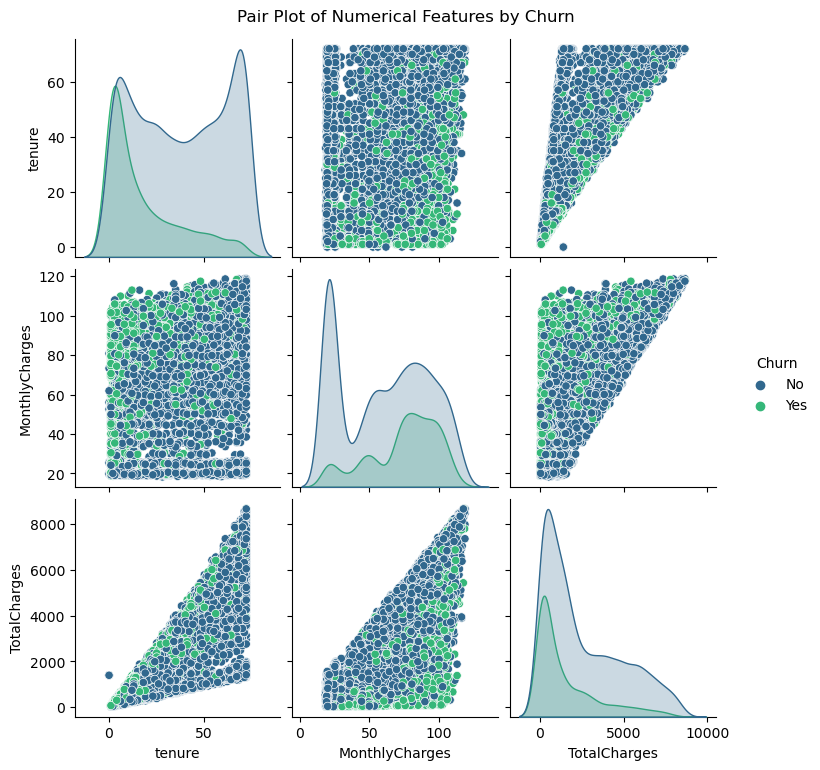

In [259]:


# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median value
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Count plots
features = ['gender', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=feature, hue='Churn', palette='viridis')
    plt.title(f'Count Plot of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

# Box Plot for numerical features vs. churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x='Churn', y=feature, palette='viridis')
    plt.title(f'Box Plot of {feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_features + ['Churn']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# Bar Plot for average charges for different services vs. churn
services = ['InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport']
plt.figure(figsize=(20, 15))
for i, service in enumerate(services, 1):
    plt.subplot(2, 2, i)
    avg_charges = data.groupby([service, 'Churn'])['MonthlyCharges'].mean().reset_index()
    sns.barplot(data=avg_charges, x=service, y='MonthlyCharges', hue='Churn', palette='viridis')
    plt.title(f'Average Monthly Charges by {service} and Churn')
    plt.xlabel(service)
    plt.ylabel('Average Monthly Charges')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

# Pair Plot to visualize pairwise relationships between numerical features, colored by churn
sns.pairplot(data=data, vars=numerical_features, hue='Churn', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features by Churn', y=1.02)
plt.show()


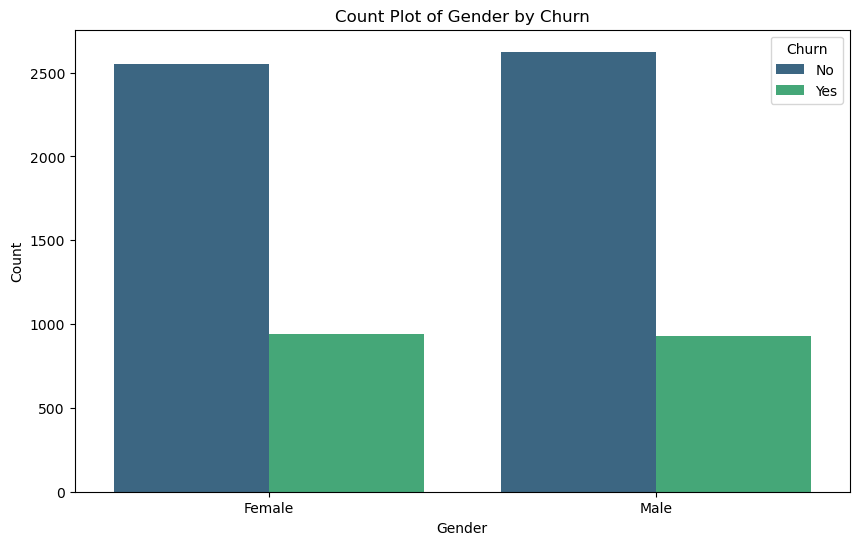

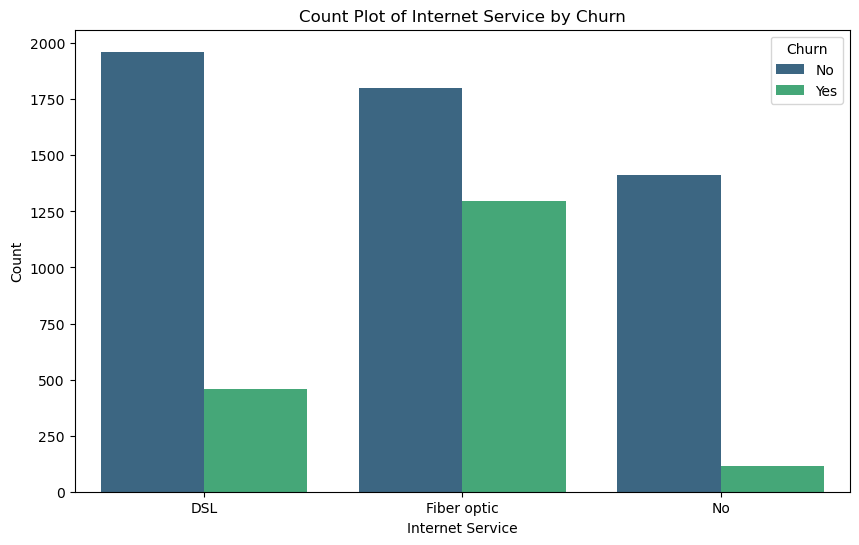

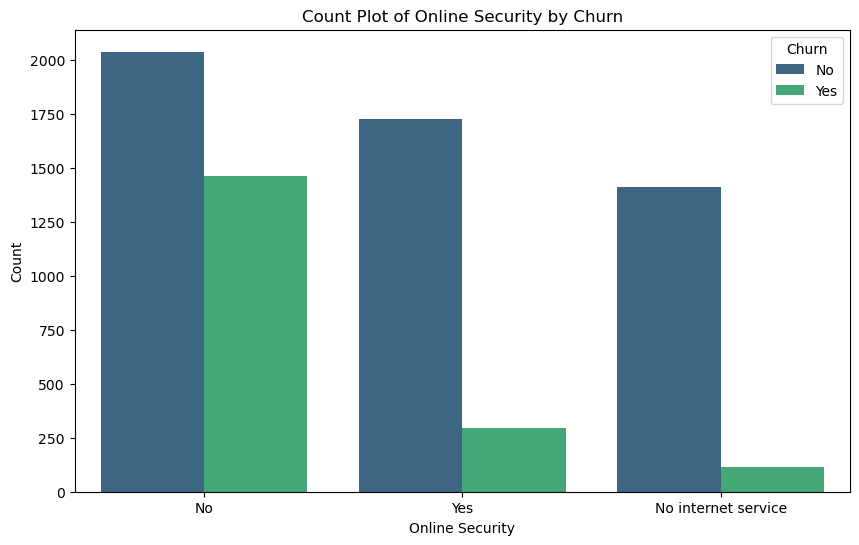

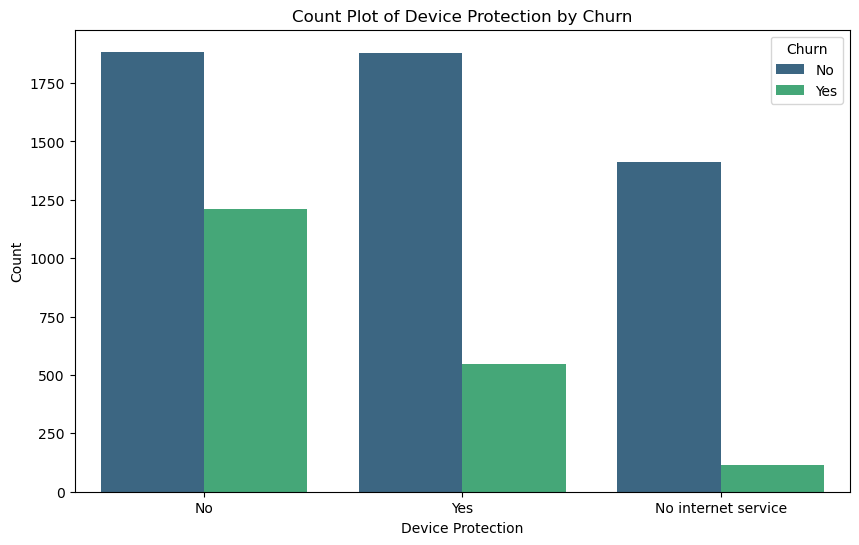

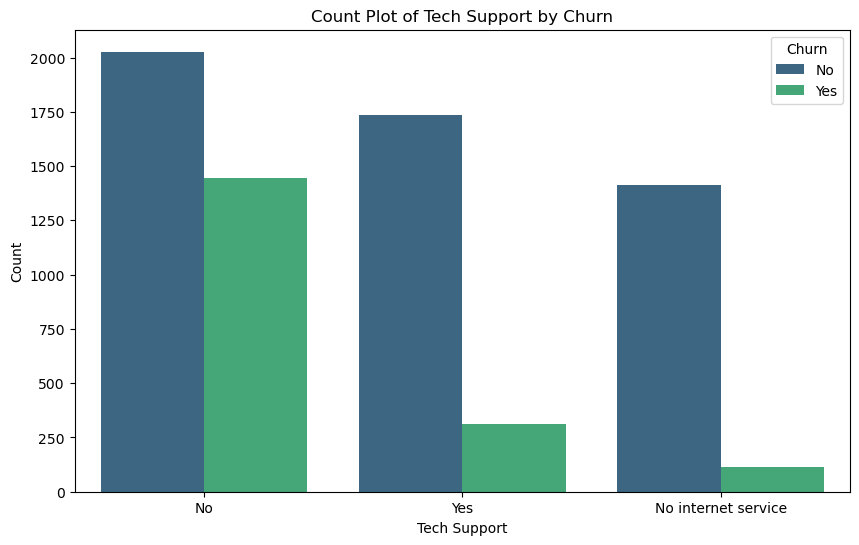

In [260]:

# Count Plot: Gender vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='gender', hue='Churn', palette='viridis')
plt.title('Count Plot of Gender by Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Count Plot: InternetService vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='InternetService', hue='Churn', palette='viridis')
plt.title('Count Plot of Internet Service by Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Count Plot: OnlineSecurity vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='OnlineSecurity', hue='Churn', palette='viridis')
plt.title('Count Plot of Online Security by Churn')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Count Plot: DeviceProtection vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='DeviceProtection', hue='Churn', palette='viridis')
plt.title('Count Plot of Device Protection by Churn')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Count Plot: TechSupport vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='TechSupport', hue='Churn', palette='viridis')
plt.title('Count Plot of Tech Support by Churn')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


### Boxplots of different features

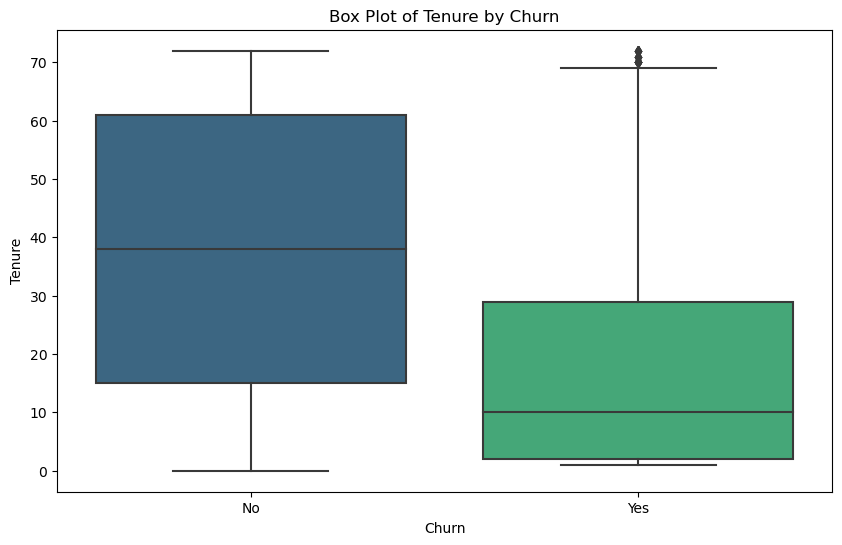

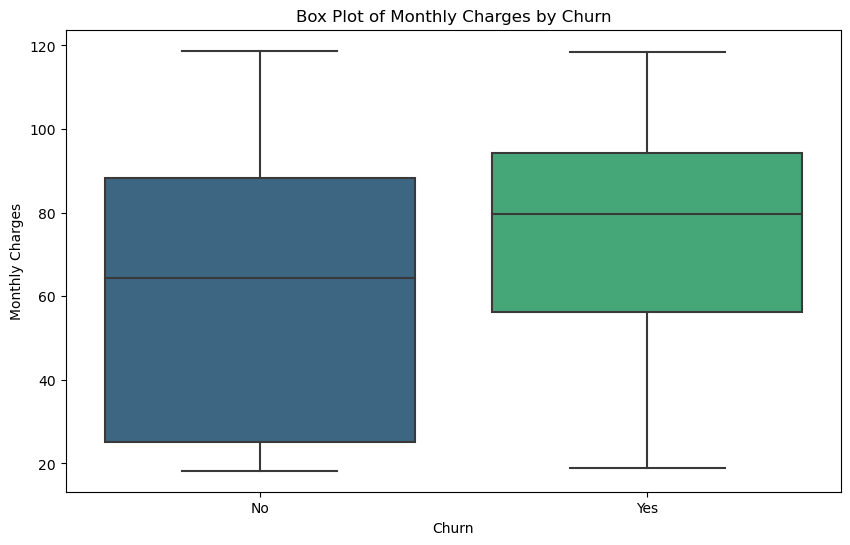

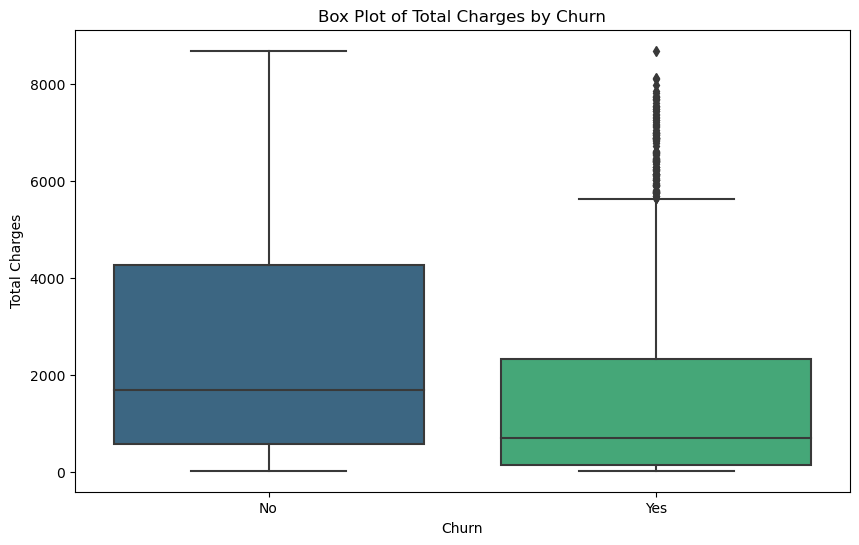

In [261]:
# Box Plot: Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='tenure', palette='viridis')
plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

# Box Plot: MonthlyCharges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='MonthlyCharges', palette='viridis')
plt.title('Box Plot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# Box Plot: TotalCharges vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='TotalCharges', palette='viridis')
plt.title('Box Plot of Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()


We can see from the box plots that people who have been present longer are less likely to leave and those people who are newer are more likely.
Also from the other boxplots we can find that people with little monthly charges are not leaving as much but this is not the case for Total charges as people with minimal total charges are leaving more than others. 
This could be due to not opting for different features provided by the company and this would align with our previous findings.

### Correlation Matrix

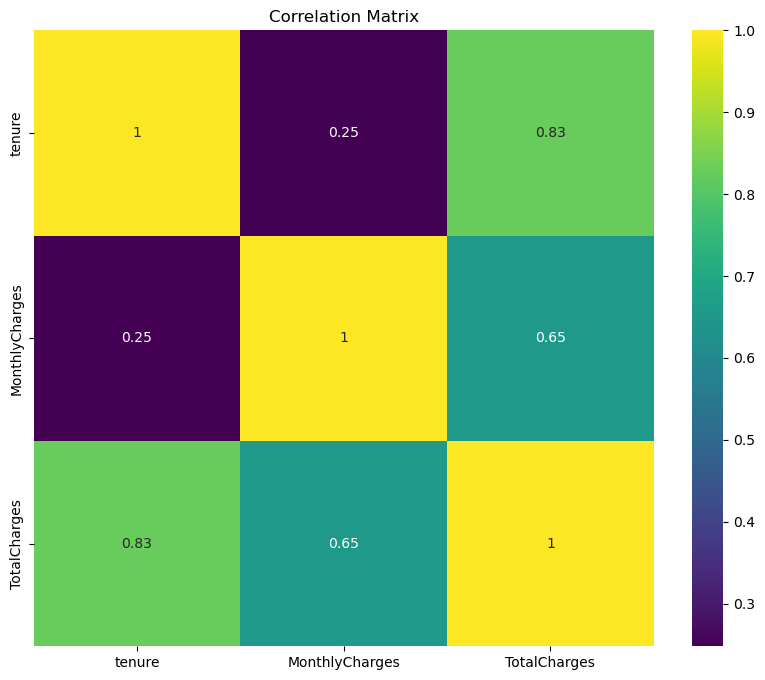

In [262]:
# Heatmap: Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


We are ability to find the correlation between different columns and understand how they go hand in hand.

### Barplot of different features

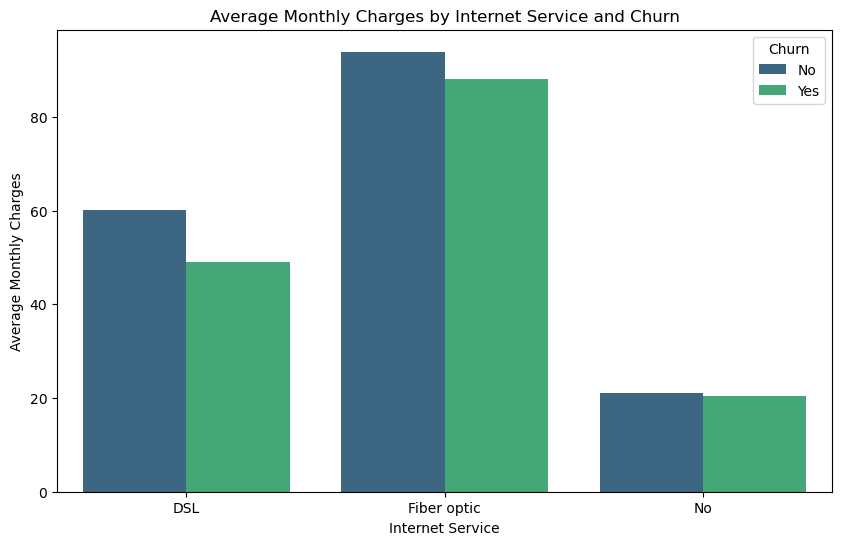

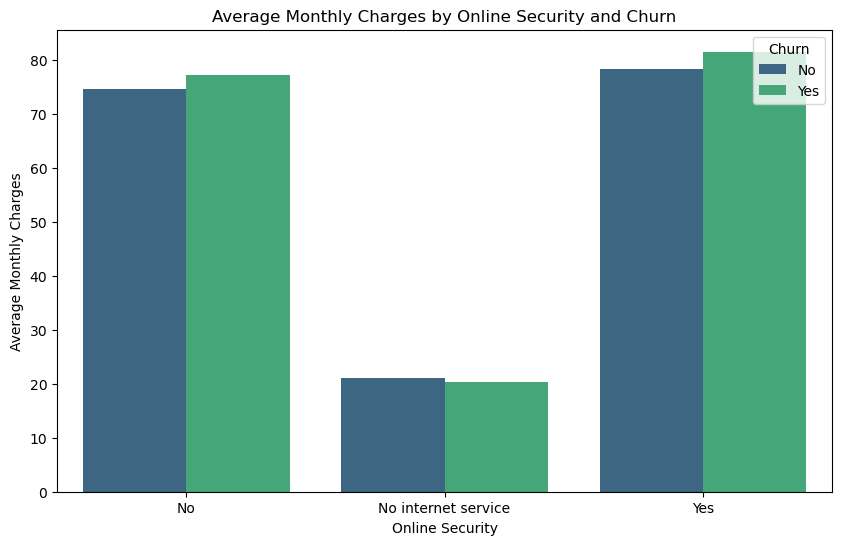

In [263]:
# Bar Plot: Average Monthly Charges by InternetService and Churn
plt.figure(figsize=(10, 6))
avg_charges = data.groupby(['InternetService', 'Churn'])['MonthlyCharges'].mean().reset_index()
sns.barplot(data=avg_charges, x='InternetService', y='MonthlyCharges', hue='Churn', palette='viridis')
plt.title('Average Monthly Charges by Internet Service and Churn')
plt.xlabel('Internet Service')
plt.ylabel('Average Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Bar Plot: Average Monthly Charges by OnlineSecurity and Churn
plt.figure(figsize=(10, 6))
avg_charges = data.groupby(['OnlineSecurity', 'Churn'])['MonthlyCharges'].mean().reset_index()
sns.barplot(data=avg_charges, x='OnlineSecurity', y='MonthlyCharges', hue='Churn', palette='viridis')
plt.title('Average Monthly Charges by Online Security and Churn')
plt.xlabel('Online Security')
plt.ylabel('Average Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.show()


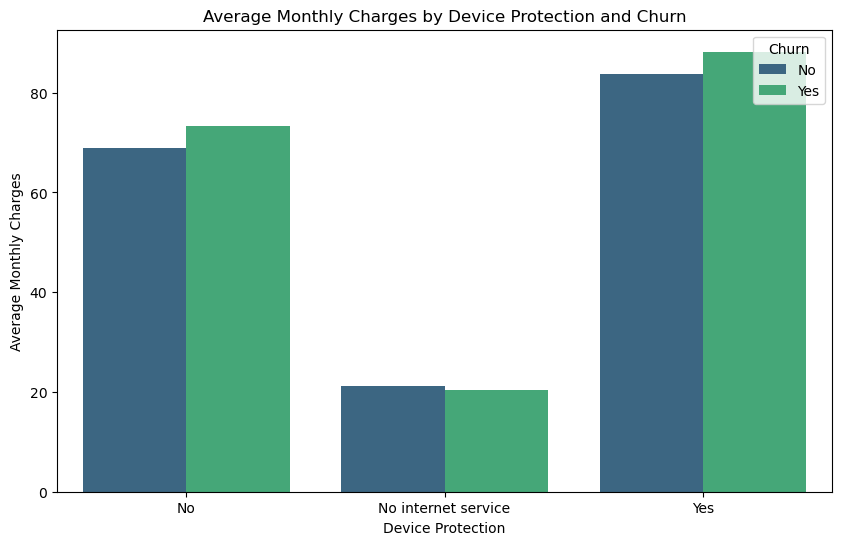

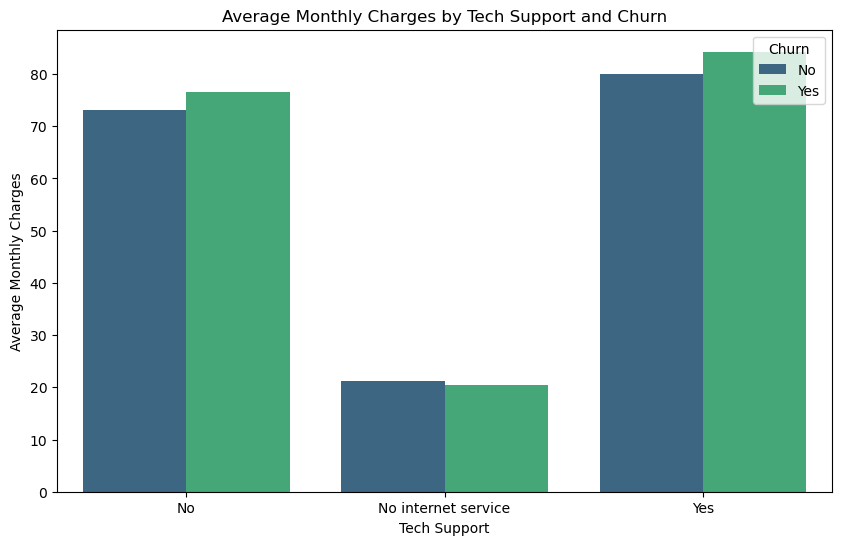

In [264]:
# Bar Plot: Average Monthly Charges by DeviceProtection and Churn
plt.figure(figsize=(10, 6))
avg_charges = data.groupby(['DeviceProtection', 'Churn'])['MonthlyCharges'].mean().reset_index()
sns.barplot(data=avg_charges, x='DeviceProtection', y='MonthlyCharges', hue='Churn', palette='viridis')
plt.title('Average Monthly Charges by Device Protection and Churn')
plt.xlabel('Device Protection')
plt.ylabel('Average Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Bar Plot: Average Monthly Charges by TechSupport and Churn
plt.figure(figsize=(10, 6))
avg_charges = data.groupby(['TechSupport', 'Churn'])['MonthlyCharges'].mean().reset_index()
sns.barplot(data=avg_charges, x='TechSupport', y='MonthlyCharges', hue='Churn', palette='viridis')
plt.title('Average Monthly Charges by Tech Support and Churn')
plt.xlabel('Tech Support')
plt.ylabel('Average Monthly Charges')
plt.legend(title='Churn', loc='upper right')
plt.show()


### Pairplot of different features

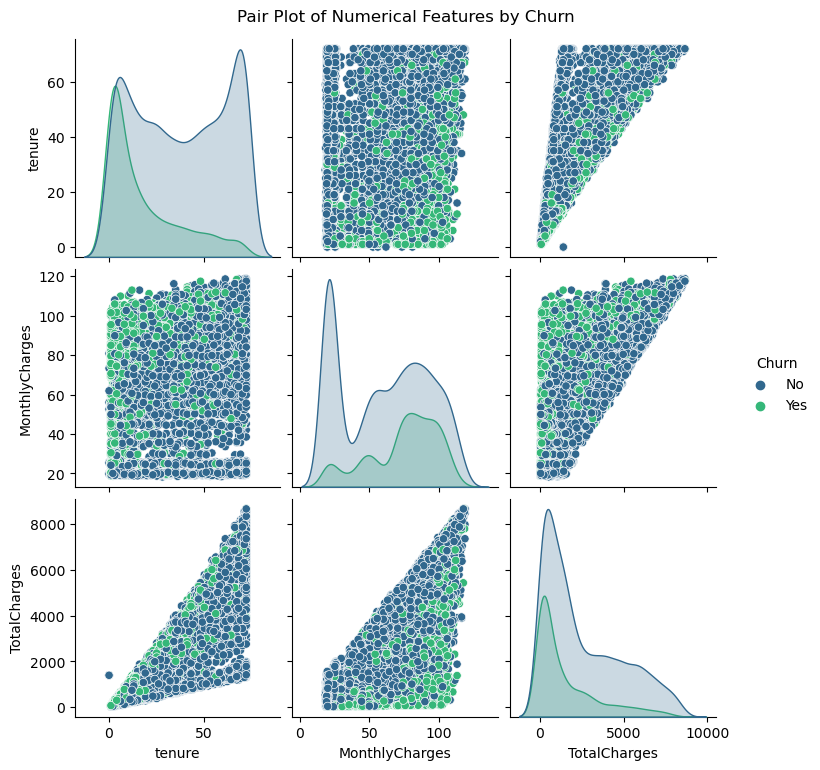

In [265]:
# Pair Plot of Numerical Features by Churn
sns.pairplot(data=data, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features by Churn', y=1.02)
plt.show()


### Getting the list of all columns which have only Yes and No's to convert it to 1's and 0's respectively

In [266]:
list_of_binary_columns = []

print("COLUMNS".center(30), "No of Unique Values".center(30), '\n')

data2=data

for column in data.columns:
    num_unique_values = data[column].nunique()
    print(column.center(30), str(num_unique_values).center(30))
    
    if num_unique_values == 2:
        list_of_binary_columns.append(column)

# Display the list of binary columns
print("\nList of binary columns:", list_of_binary_columns)


           COLUMNS                  No of Unique Values       

          customerID                        7043             
            gender                           2               
        SeniorCitizen                        2               
           Partner                           2               
          Dependents                         2               
            tenure                           73              
         PhoneService                        2               
        MultipleLines                        3               
       InternetService                       3               
        OnlineSecurity                       3               
         OnlineBackup                        3               
       DeviceProtection                      3               
         TechSupport                         3               
         StreamingTV                         3               
       StreamingMovies                       3               
      

In [267]:
for column in list_of_binary_columns:
    data[column] = data[column].apply(lambda x: 1 if x == 'Yes' else 0)
data.drop(['customerID'], axis=1, inplace=True)
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,0,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,0,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


## Encoding the data
### Converting all categorical value to numeric value

In [268]:
columns_to_encode = [col for col in data.columns 
                     if col not in list_of_binary_columns 
                     and data[col].dtype == 'object']

data_encoded = pd.get_dummies(data, columns=columns_to_encode)

data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### Separating the data into train and test sets

In [269]:
X = data_encoded.drop(['Churn'], axis=1)  # Features (all columns except 'Churn')
y = data_encoded['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 40)
Shape of X_test: (1409, 40)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


## Decision Tree Classifier

In [271]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics:
Accuracy: 0.7175301632363378
Precision: 0.46786632390745503
Recall: 0.4879356568364611
F1 Score: 0.4776902887139108

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1036
           1       0.47      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409


Confusion Matrix:
[[829 207]
 [191 182]]


### Accuracy of Decision Tree Model
### 71.75%


### HYPERPARAMETER TUNING

In [272]:
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the testing data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.7643718949609652


### Finding out the best parameters for getting the highest possible accuracy in Decision Tree Classifier
### Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


## IMPROVED DECISION TREE MODEL

In [273]:
clf = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=1, min_samples_split=10)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics:
Accuracy: 0.7601135557132718
Precision: 0.5490196078431373
Recall: 0.5254691689008043
F1 Score: 0.5369863013698629

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1036
           1       0.55      0.53      0.54       373

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409


Confusion Matrix:
[[875 161]
 [177 196]]



### Accuracy of Decision Tree Model after Hyperparameter Tuning
### 76.01%

## LOGISTIC REGRESSION

Evaluation Metrics:
Accuracy: 0.8225691980127751
Precision: 0.6964856230031949
Recall: 0.5844504021447721
F1 Score: 0.6355685131195336
AUC Score: 0.8613583901787656

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.58      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Confusion Matrix:
[[941  95]
 [155 218]]


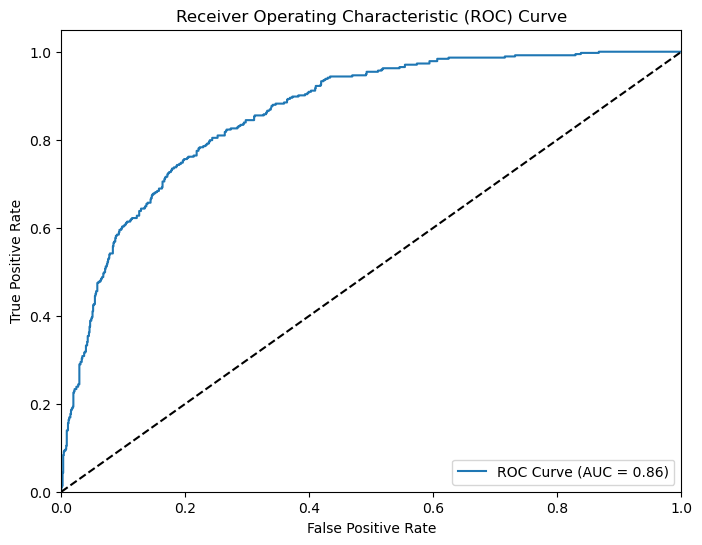

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the logistic regression classifier
clf = LogisticRegression(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict probabilities on the testing data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Accuracy of Logistic Regression model
### 82.25%

### HYPERPARAMETER TUNING

In [275]:
from sklearn.model_selection import GridSearchCV

# Define the logistic regression classifier
clf = LogisticRegression(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the testing data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy Score: 0.8190205819730305


#### Finding out the best parameters for getting the highest possible accuracy in Logistic Regression
#### Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}


## IMPROVED LOGISTIC REGRESSION MODEL

Evaluation Metrics:
Accuracy: 0.8225691980127751
Precision: 0.6964856230031949
Recall: 0.5844504021447721
F1 Score: 0.6355685131195336
AUC Score: 0.8613583901787656

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.58      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409


Confusion Matrix:
[[941  95]
 [155 218]]


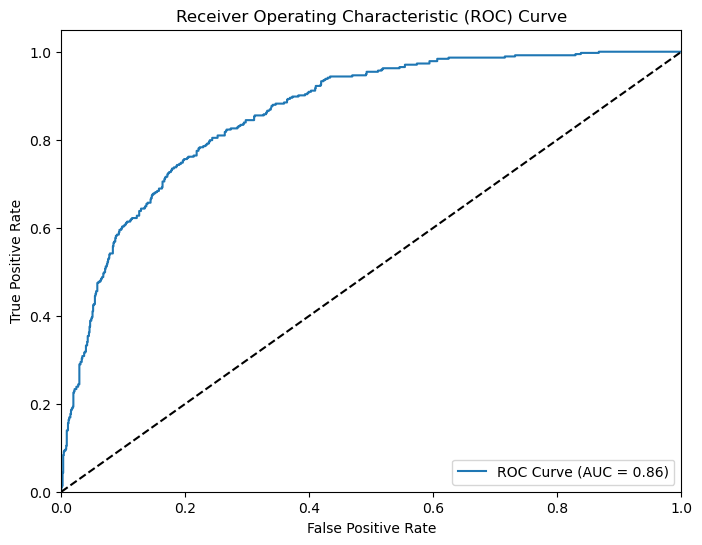

In [276]:
clf = LogisticRegression(random_state=42,C=1,penalty='l2')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict probabilities on the testing data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Accuracy of Logistic Regression model after Hyperparameter Tuning
### 82.25%

## GAUSSIAN NAIVE BAYES 

Evaluation Metrics:
Accuracy: 0.6955287437899219
Precision: 0.4602272727272727
Recall: 0.868632707774799
F1 Score: 0.6016713091922006
AUC Score: 0.836624157669734

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      1036
           1       0.46      0.87      0.60       373

    accuracy                           0.70      1409
   macro avg       0.70      0.75      0.68      1409
weighted avg       0.81      0.70      0.71      1409


Confusion Matrix:
[[656 380]
 [ 49 324]]


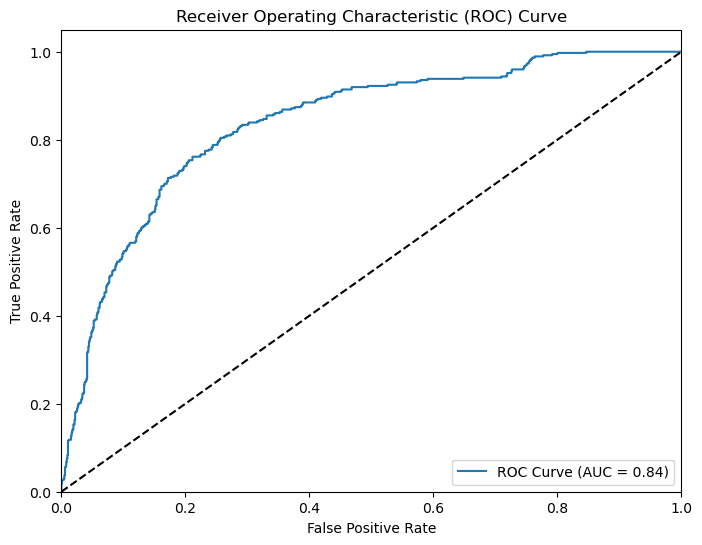

In [277]:
from sklearn.naive_bayes import GaussianNB

# Define the Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict probabilities on the testing data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Accuracy of Naive Bayes 
### 69.55%

### HYPERPARAMETER TUNING

In [278]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # You can try different scalers here
    ('clf', GaussianNB())
])

# Define the hyperparameters to tune
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]  # List of scalers to try
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the testing data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Best Hyperparameters: {'scaler': StandardScaler()}
Accuracy Score: 0.6976579134137686


#### Finding out the best parameters for getting the highest possible accuracy in Naive Bayes
#### Best Hyperparameters: {'scaler': StandardScaler()}

### IMPROVED NAIVE BAYES MODEL

Evaluation Metrics:
Accuracy: 0.6976579134137686
Precision: 0.46219686162624823
Recall: 0.868632707774799
F1 Score: 0.6033519553072626
AUC Score: 0.8364067821172378

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1036
           1       0.46      0.87      0.60       373

    accuracy                           0.70      1409
   macro avg       0.70      0.75      0.68      1409
weighted avg       0.81      0.70      0.72      1409


Confusion Matrix:
[[659 377]
 [ 49 324]]


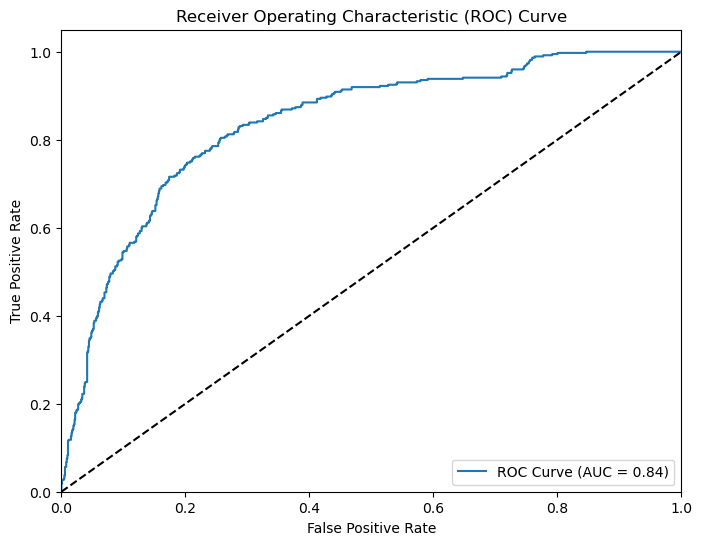

In [279]:
from sklearn.preprocessing import StandardScaler

# Define the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Define the Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the scaled training data
clf.fit(X_train_scaled, y_train)

# Predict probabilities on the scaled testing data
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Predict on the scaled testing data
y_pred = clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Accuracy of Naive Bayes after Hyperparameter Tuning
### 69.76%

## RANDOM FOREST CLASSIFIER

Evaluation Metrics:
Accuracy: 0.794889992902768
Precision: 0.6532846715328468
Recall: 0.47989276139410186
F1 Score: 0.553323029366306
AUC Score: 0.8260814433736686

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
[[941  95]
 [194 179]]


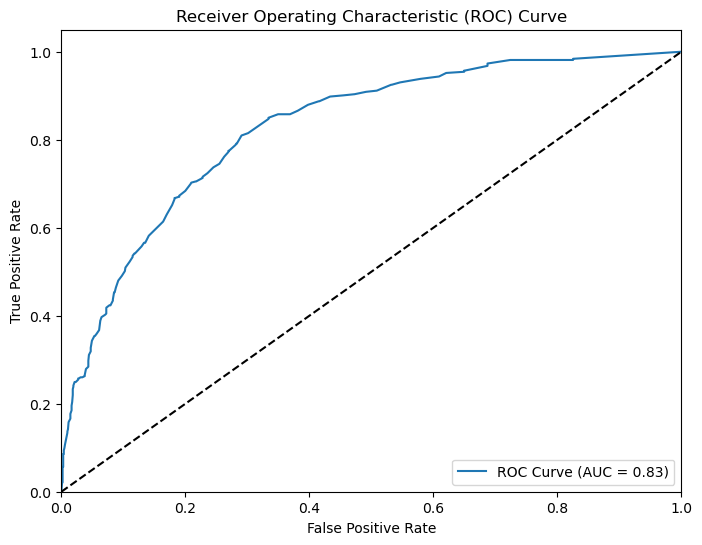

In [280]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict probabilities on the testing data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Accuracy of Random Forest Classifier
### 79.48%

### HYPERPARAMETER TUNING

In [281]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define the Random Forest classifier
# clf = RandomForestClassifier(random_state=42)

# # Define the hyperparameters to tune
# param_grid = {
#     'n_estimators': [50, 100, 200],           # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],           # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required at each leaf node
# }

# # Instantiate the GridSearchCV object
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# # Perform grid search
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Predict on the testing data
# y_pred = best_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy Score:", accuracy)


In [282]:
#Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
#Accuracy Score: 0.8069552874378992

#### Finding out the best parameters for getting the highest possible accuracy in Random Forest Classifier
#### Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


### IMPROVED RANDOM FOREST CLASSIFIER MODEL

Evaluation Metrics:
Accuracy: 0.8105039034776437
Precision: 0.6827586206896552
Recall: 0.5308310991957105
F1 Score: 0.5972850678733032
AUC Score: 0.8609184634653803

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[944  92]
 [175 198]]


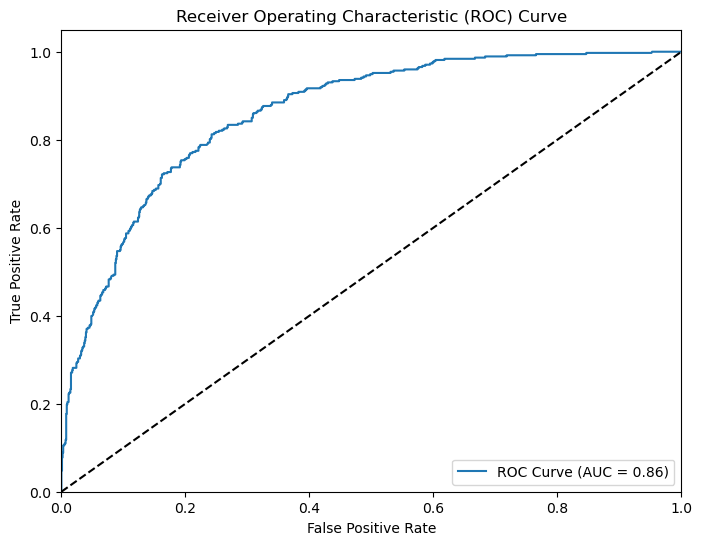

In [283]:
clf = RandomForestClassifier(random_state=42,max_depth=10,min_samples_leaf=4,min_samples_split=10,n_estimators=50)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict probabilities on the testing data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Accuracy of Random Forest Classifier after Hyperparameter Tuning
### 81.05%

## ADABOOST CLASSIFIER

Evaluation Metrics:
Accuracy: 0.8133427963094393
Precision: 0.6729559748427673
Recall: 0.5737265415549598
F1 Score: 0.6193921852387844
AUC Score: 0.863468744500916

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409


Confusion Matrix:
[[932 104]
 [159 214]]


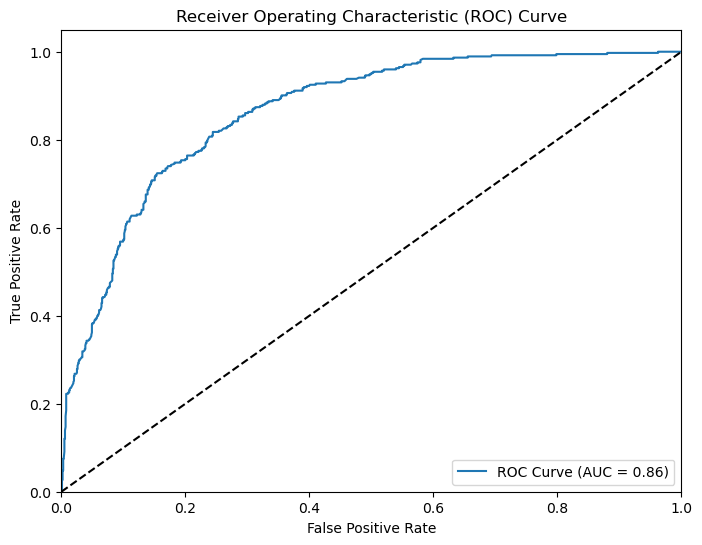

In [284]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict probabilities on the testing data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Accuracy of AdaBoost Classifier
### 81.33%

### HYPERPARAMETER TUNING

In [285]:
clf = AdaBoostClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of weak learners to train iteratively
    'learning_rate': [0.1, 0.5, 1.0]       # Learning rate shrinks the contribution of each classifier
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the testing data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Best Hyperparameters: {'learning_rate': 0.5, 'n_estimators': 200}
Accuracy Score: 0.8133427963094393


#### Adaboost Classifier even after hyperparameter tuning provides no change in accuracy so no further adjustments are required.


## XGBOOST CLASSIFIER

In [286]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define the XGBoost classifier
clf = xgb.XGBClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy Score: 0.794889992902768
Precision Score: 0.6390728476821192
Recall Score: 0.517426273458445
F1 Score: 0.5718518518518518
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Confusion Matrix:
[[927 109]
 [180 193]]


### Accuracy of XGBoost Classifier
### 79.48%

### HYPERPARAMETER TUNING

In [287]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the ensemble
    'max_depth': [3, 5, 7],                   # Maximum depth of a tree
    'learning_rate': [0.1, 0.01, 0.001]       # Step size shrinkage to prevent overfitting
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the testing data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy Score: 0.8133427963094393


#### Finding out the best parameters for getting the highest possible accuracy in XGBoost Classifier
#### Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


### IMPROVED XGBOOST CLASSIFIER MODEL

In [288]:
import xgboost as xgb

# Define the XGBoost classifier
clf = xgb.XGBClassifier(random_state=42,learning_rate=0.1,max_depth=3,n_estimators=50)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy Score: 0.8133427963094393
Precision Score: 0.6923076923076923
Recall Score: 0.5308310991957105
F1 Score: 0.6009104704097116
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[948  88]
 [175 198]]



### Accuracy of XGBoost Classifier after Hyperparameter Tuning
### 81.33%

In [289]:
!pip install shap

## SHAP ANALYSIS
### Shap Analysis is done to understand how the models are using different features to get the results and what feature is very important in the classification process and what has little to no impact on the decision making process.
### We are able to visualize how the models get the result whether or not the customer churns or not using SHAP analysis. We can better understand the reason for the customer leaving and we can then further take measures to improve the quality or standard or benefits of each and every customer so that he/she will not be choosing to leave

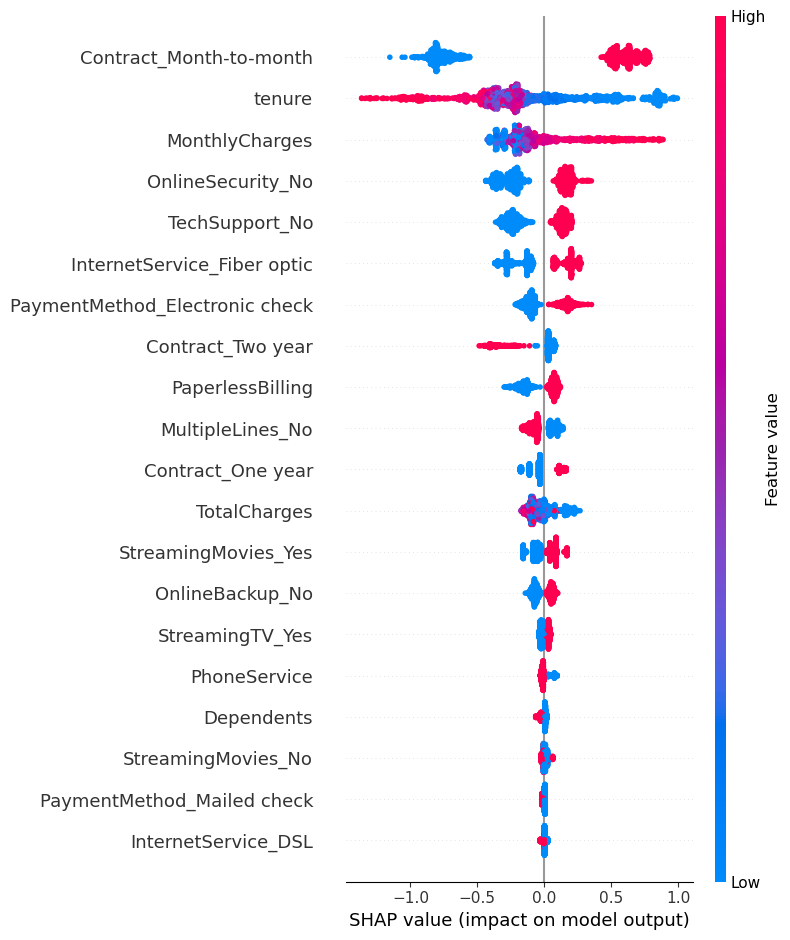

In [290]:
import shap
shap.initjs()
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

#### Understanding of the results provided in the SHAP analysis
We can see that there are trends from which we can understand what reasons are inclining the customers to reject further services from the telecommunications company.

We can see that customers who have not opted for online security and techsupport etc are more inclined to leave than others. 
Customers who have been present longer are very less likely to leave than others. Also customers who have opted for shorter contracts are very intented on leaving than others.
If the monthly charges of customers are high, then the customer is being more inclined to leave.

## Finding out the features of the customers who are likely to withdraw from the services provided by the company.

In [291]:
false_positives = (y_pred == 1) & (y_test == 0)
fp_instances = pd.DataFrame(X_test[false_positives], columns=X.columns)

# Print false positives
print("False Positive Instances:")
fp_instances

False Positive Instances:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3328,0,0,0,0,1,1,1,70.25,70.25,1,...,1,0,0,1,0,0,0,0,1,0
3469,0,0,0,0,15,1,1,91.50,1400.30,1,...,0,0,1,1,0,0,0,0,1,0
3872,0,0,1,1,9,1,0,103.10,970.45,1,...,0,0,1,1,0,0,0,0,1,0
3254,0,0,0,0,17,1,1,101.80,1752.45,1,...,0,0,1,1,0,0,0,0,1,0
535,0,0,0,0,12,1,1,89.55,1021.75,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6497,0,0,0,0,52,1,1,103.05,5364.80,0,...,0,0,1,1,0,0,0,0,1,0
181,0,0,0,0,1,1,0,45.30,45.30,1,...,1,0,0,1,0,0,0,0,0,1
2306,0,0,0,0,3,1,1,69.85,199.85,1,...,1,0,0,1,0,0,0,0,1,0
5970,0,0,1,0,5,1,1,89.15,413.25,0,...,0,0,1,1,0,0,0,0,1,0


### Finding that out for a bigger sample by increasing the test size but not training the model beforehand so that it has a bigger sample for training and then we can find out the most likely people to leave in a larger scale.

In [292]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.999,random_state=42)

# Train the classifier on the training data

# Predict probabilities on the testing data
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Predict on the testing data
y_pred = clf.predict(X_test)

false_positives = (y_pred == 1) & (y_test == 0)
fp_instances = pd.DataFrame(X_test[false_positives], columns=X.columns)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Print false positives
print("False Positive Instances:")
fp_instances.head(8)

0.8121091529277998
False Positive Instances:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3328,0,0,0,0,1,1,1,70.25,70.25,1,...,1,0,0,1,0,0,0,0,1,0
3469,0,0,0,0,15,1,1,91.50,1400.30,1,...,0,0,1,1,0,0,0,0,1,0
3872,0,0,1,1,9,1,0,103.10,970.45,1,...,0,0,1,1,0,0,0,0,1,0
3254,0,0,0,0,17,1,1,101.80,1752.45,1,...,0,0,1,1,0,0,0,0,1,0
535,0,0,0,0,12,1,1,89.55,1021.75,0,...,1,0,0,1,0,0,0,0,1,0
1397,0,0,0,0,4,1,1,82.85,319.60,1,...,0,0,1,1,0,0,0,1,0,0
5057,0,0,0,0,9,1,1,75.85,724.65,0,...,1,0,0,1,0,0,0,0,1,0
1079,0,0,1,1,3,1,1,69.55,200.20,1,...,1,0,0,1,0,0,0,0,1,0


## Listing out all the customer IDs of customers who are likely to reject the services provided in the future.

In [293]:
list_of_customers=[]

for i in fp_instances.index:
    list_of_customers.append(cust_id[i])
    
print("Customers who are likely to leave in the future :")

for i in list_of_customers:
    print(i,end="   ")
    
    
print("\n\nTotal : ",len(list_of_customers))

Customers who are likely to leave in the future :
1640-PLFMP   9402-ORRAH   2018-PZKMU   3629-ZNKXA   5348-CAGXB   8714-CTZJW   7354-OIJLX   0455-XFASS   4273-MBHYA   5119-NZPTV   5600-KTXFM   9133-AYJZG   8800-JOOCF   1666-JXLKU   5928-QLDHB   3566-HJGPK   4929-XIHVW   4927-WWOOZ   3841-CONLJ   5117-IFGPS   2905-KFQUV   8818-DOPVL   8120-JDCAM   2545-EBUPK   1219-NNDDO   9638-JIQYA   5960-MVTUK   9633-XQABV   7159-FVYPK   3001-UNBTL   2985-FMWYF   3496-LFSZU   4537-DKTAL   8486-AYEQH   4137-BTIKL   7858-GTZSP   1866-OBPNR   6778-YSNIH   2792-LSHWX   4132-KALRO   8064-RAVOH   7252-NTGSS   3096-GKWEB   7404-JLKQG   4686-UXDML   4060-LDNLU   3966-HRMZA   8242-SOQUO   9957-YODKZ   1628-BIZYP   8648-PFRMP   7145-FEJWU   2275-RBYQS   8180-AKMJV   6198-ZFIOJ   8445-DNBAE   6542-LWGXJ   9094-AZPHK   8705-WZCYL   2880-FPNAE   1226-IENZN   2424-WVHPL   8356-WUAOJ   5442-BHQNG   9314-IJWSQ   8161-QYMTT   5989-PGKJB   6175-IRFIT   4367-NHWMM   2468-SJFLM   6407-UTSLV   0018-NYROU   6158-HDPXZ   7

### We have now identified all the customers who are likely to reject further services from the telecommunications company in the future. This enables us to take preventive measures so as not to lose these customers.
### We can provide offers or other benefits, or convince them to go with any other mode of service which is more likely to retain the customer based on their interests.
### Through SHAP analysis, we are able to find out what features are pushing the customer to retain the services more and focus more on those features and push other customers to enable or switch to those features which would make these customers more likely to stay with the company.
### This analysis would help prevent more and more customers from leaving the company as we can take the required measures based on the patterns we have found.

## CONCLUSION
### Summary
In this project, we undertook the task of predicting customer churn using a dataset from a telecommunications company. The dataset included various features related to customer demographics, account information, and service usage. The primary goal was to build and evaluate several machine learning models to accurately predict whether a customer would churn.

#### Data Preprocessing
We began by preprocessing the data, which included:


Data Cleaning:
Handling missing values by removing or imputing them appropriately.
Ensuring data consistency and correcting any errors or anomalies.

Converting Categorical Variables:
Using one-hot encoding for categorical variables with multiple categories.
Converting binary categorical variables into 0s and 1s for easier analysis.

#### Exploratory Data Analysis
We conducted exploratory data analysis (EDA) to understand the distribution and relationships of features within the dataset. This included visualizations like count plots for categorical features against churn to identify any noticeable patterns.


#### Model Building and Evaluation
We implemented various machine learning models, including:

Logistic Regression
Decision Tree
Naive Bayes
Random Forest
AdaBoost
XGBoost

Each model was evaluated using metrics such as accuracy, precision, recall, F1-score, and AUC (Area Under the ROC Curve). These metrics provided insights into the performance of each model:

Accuracy: The overall correctness of the model's predictions.

Precision: The proportion of positive identifications that were actually correct.

Recall: The proportion of actual positives that were correctly identified.

F1 Score: The harmonic mean of precision and recall, providing a balance between the two.

AUC: The area under the ROC curve, representing the model's ability to distinguish between classes.

Hyperparameter Tuning
To optimize model performance, we conducted hyperparameter tuning for several models using grid search and cross-validation. This process involved selecting the best parameters for each model to enhance their predictive accuracy and robustness.

#### SHAP Analysis
We employed SHAP (SHapley Additive exPlanations) values to interpret the models, particularly focusing on the logistic regression model. SHAP values helped in understanding the contribution of each feature to the model's predictions, providing valuable insights into which factors most significantly influence customer churn.

#### Results
Logistic Regression : Accuracy(82.25%)

Decision Tree : Accuracy(76.01%)

Naive Bayes : Accuracy(69.76%)

Random Forest : Accuracy(81.05%)

AdaBoost : Accuracy(81.33%)

XGBoost : Accuracy(81.33%)


#### Further Insights
We have understood that people who have not been taking the services of the company for a long period of time are very inclined to leave.
People who are not opting for security and other beneficial services are also leaving at a high rate. Also it is also helpful in tying the customer down to longer contracts.

We can take best measures based on these findings as we can provide offers at the beginning of the customers usage and also provide security services and tech support services at a smaller rate at the beginning so that they understand the importance and how useful it is for them. And they are more likely to opt for it once they understand the usefulness of it as we have found that people who have opted for these services are more inclined to staying.
